# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)
    
from utils.data import load_breast_cancer_kagglehub, standardize_fit_transform
from utils.internal_metrics import silhouette_score
from KMeans import KMeans

# Load and standardize data

In [2]:
X, y, feature_names = load_breast_cancer_kagglehub()
Xs, scaler = standardize_fit_transform(X)
print(X.shape, y.shape, len(feature_names))


Loaded CSV: C:\Users\Wind\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2\data.csv
(569, 30) (569,) 30


# Run K-Means with k=2 (Random vs K-Means++)

In [3]:
k = 2

km_pp = KMeans(n_clusters=k, init="kmeans++", max_iter=300, tol=1e-4, random_state=42)
labels_pp = km_pp.fit_predict(Xs)
sil_pp = silhouette_score(Xs, labels_pp)

km_rand = KMeans(n_clusters=k, init="random", max_iter=300, tol=1e-4, random_state=42)
labels_r = km_rand.fit_predict(Xs)
sil_r = silhouette_score(Xs, labels_r)

print("KMeans++ inertia:", km_pp.inertia_, "iters:", km_pp.n_iter_, "sil:", sil_pp)
print("Random   inertia:", km_rand.inertia_, "iters:", km_rand.n_iter_, "sil:", sil_r)

KMeans++ inertia: 11595.683312822135 iters: 8 sil: 0.34473443466110537
Random   inertia: 11595.526607115786 iters: 7 sil: 0.34338224069077816


# Convergence comparison (inertia over iterations)

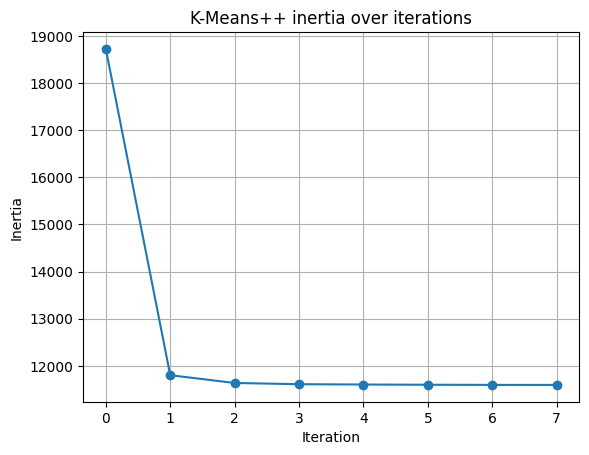

In [4]:
plt.figure()
plt.plot(km_pp.inertia_history_, marker="o")
plt.xlabel("Iteration")
plt.ylabel("Inertia")
plt.title("K-Means++ inertia over iterations")
plt.grid(True)
plt.show()

s

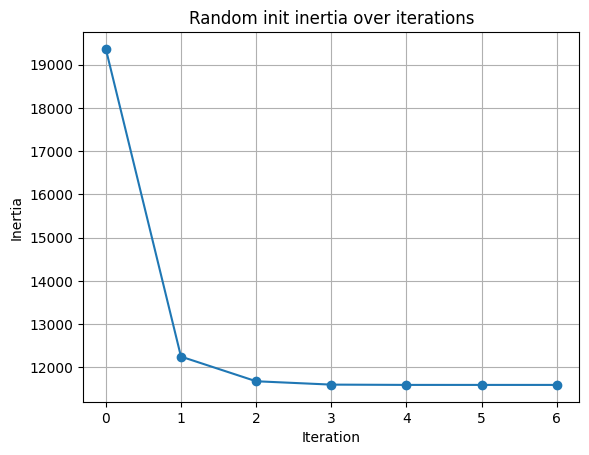

In [5]:
plt.figure()
plt.plot(km_rand.inertia_history_, marker="o")
plt.xlabel("Iteration")
plt.ylabel("Inertia")
plt.title("Random init inertia over iterations")
plt.grid(True)
plt.show()